In [1]:
import pandas as pd 

import numpy as np

from functools import reduce

from datetime import datetime

from dateutil import parser

import warnings
warnings.filterwarnings("ignore")

In [2]:
path_data = ''

In [3]:
def Import_data(file , typefile = 0):
    
    if typefile == 0:
        df = pd.read_csv(path_data + file, delimiter=";", sep=",", encoding='Latin-1')
    elif typefile == 1:
        df = pd.read_csv(path_data + file,  sep=",", encoding='Latin-1')
    else:
        
        df = pd.read_csv(path_data + file)
        
    return df

In [4]:
Dm_file = "Dm3Clean.csv"
Dm = Import_data(Dm_file, typefile=1) 

## Data manipulation

**Working on data types and patient data

In [5]:
Dm.dtypes

ID_CONSULTATION          float64
ID_DIAGNOSTIC_PATIENT    float64
DATE_CREATION             object
PAT_ID                   float64
PAT_SEXE                  object
PAT_PROFESSION            object
PAT_DATEHNAISSANCE        object
POIDS_EDITION            float64
ORD_TAILLE_EDITION       float64
EXAMEN                    object
CONCLUSION                object
LIBELLE_x                 object
TITRE_x                   object
TITRE_y                   object
CODE_CIM10                object
AGE                      float64
BMI                      float64
YEAR                       int64
visit_summary             object
TaS                      float64
TaD                      float64
Glycemie                 float64
RespRate                 float64
Albumin                  float64
Creatine                 float64
dtype: object

In [6]:
# fixing date
def Parser(x):
    
    if isinstance(x , str) :
        
        return parser.parse(x)
    return x

Dm['PAT_DATEHNAISSANCE'] = Dm['PAT_DATEHNAISSANCE'].apply(Parser)
Dm['DATE_CREATION'] = Dm['DATE_CREATION'].apply(Parser)

In [7]:
#Fixing object
string_cols = ['PAT_SEXE','PAT_PROFESSION','EXAMEN','CONCLUSION','LIBELLE_x','TITRE_x','TITRE_y','CODE_CIM10','visit_summary']
Dm = Dm.astype({col : "string" for col in string_cols} )

In [8]:
Dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104161 entries, 0 to 104160
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID_CONSULTATION        104161 non-null  float64       
 1   ID_DIAGNOSTIC_PATIENT  104161 non-null  float64       
 2   DATE_CREATION          104161 non-null  datetime64[ns]
 3   PAT_ID                 104161 non-null  float64       
 4   PAT_SEXE               104161 non-null  string        
 5   PAT_PROFESSION         104161 non-null  string        
 6   PAT_DATEHNAISSANCE     104161 non-null  datetime64[ns]
 7   POIDS_EDITION          10198 non-null   float64       
 8   ORD_TAILLE_EDITION     841 non-null     float64       
 9   EXAMEN                 75290 non-null   string        
 10  CONCLUSION             11058 non-null   string        
 11  LIBELLE_x              104161 non-null  string        
 12  TITRE_x                7925 non-null    stri

In [9]:
Dm.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_CONSULTATION,104161.0,81.877006,86.049209,1.001000,18.759,45.875,130.074,972.0
ID_DIAGNOSTIC_PATIENT,104161.0,25.456314,101.019950,1.000000,6.066,8.974,13.729,999.0
PAT_ID,104161.0,31.795155,78.909605,1.003000,8.208,14.695,28.253,983.0
POIDS_EDITION,10198.0,30.345504,28.951243,1.000000,9.800,15.000,55.000,140.0
ORD_TAILLE_EDITION,841.0,155.034483,27.865408,22.000000,159.000,162.000,170.000,193.0
AGE,104161.0,51.402300,18.100071,2.000000,42.000,54.000,64.000,102.0
BMI,26205.0,33.324158,6.577073,0.036364,32.000,35.000,37.000,39.0
YEAR,104161.0,2017.394015,1.114698,2015.000000,2016.000,2017.000,2018.000,2020.0
TaS,38013.0,172.417647,15.899558,136.000000,160.000,179.000,185.000,191.0
TaD,38013.0,110.395704,18.108523,13.100000,96.000,105.000,126.000,138.0


In [10]:
Dm.shape

(104161, 25)

In [11]:
Dm.columns

Index(['ID_CONSULTATION', 'ID_DIAGNOSTIC_PATIENT', 'DATE_CREATION', 'PAT_ID',
       'PAT_SEXE', 'PAT_PROFESSION', 'PAT_DATEHNAISSANCE', 'POIDS_EDITION',
       'ORD_TAILLE_EDITION', 'EXAMEN', 'CONCLUSION', 'LIBELLE_x', 'TITRE_x',
       'TITRE_y', 'CODE_CIM10', 'AGE', 'BMI', 'YEAR', 'visit_summary', 'TaS',
       'TaD', 'Glycemie', 'RespRate', 'Albumin', 'Creatine'],
      dtype='object')

In [12]:
Num_dm = Dm[['AGE', 'BMI', 'TaS', 'TaD', 'Glycemie', 'RespRate', 'Albumin', 'Creatine']]

In [13]:
## here i think it is better to get rid of all columns which have big numbers of nan values because they will affect the model negatively

In [14]:
Dm.isnull().sum()

ID_CONSULTATION               0
ID_DIAGNOSTIC_PATIENT         0
DATE_CREATION                 0
PAT_ID                        0
PAT_SEXE                      0
PAT_PROFESSION                0
PAT_DATEHNAISSANCE            0
POIDS_EDITION             93963
ORD_TAILLE_EDITION       103320
EXAMEN                    28871
CONCLUSION                93103
LIBELLE_x                     0
TITRE_x                   96236
TITRE_y                       0
CODE_CIM10                    0
AGE                           0
BMI                       77956
YEAR                          0
visit_summary             46134
TaS                       66148
TaD                       66148
Glycemie                  84921
RespRate                  91755
Albumin                   97257
Creatine                  99366
dtype: int64

In [15]:
## i am not sure if this is gonna work because some of the columns you add 0 instead of nan value are strings !!!

In [16]:
Dm.fillna('0')

,ID_CONSULTATION,ID_DIAGNOSTIC_PATIENT,DATE_CREATION,PAT_ID,PAT_SEXE,PAT_PROFESSION,PAT_DATEHNAISSANCE,POIDS_EDITION,ORD_TAILLE_EDITION,EXAMEN,...,AGE,BMI,YEAR,visit_summary,TaS,TaD,Glycemie,RespRate,Albumin,Creatine
0,148.244,14.536,2015-03-12 09:01:00,42.00,M,enseignant/enseignante,1957-01-01,0,0,0,...,58.0,0,2015,0,0,0,0,0,0,0
1,131.368,13.387,2015-05-12 07:50:00,44.00,M,ONEAD,1974-01-01,0,0,0,...,41.0,0,2015,Le patient se plain de plus en plus d'essouffl...,0,0,0,10,0,0
2,34.000,5.000,2015-06-12 08:37:00,50.00,M,Djibtelcom,1944-01-01,0,0,diabÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¨te suivi,...,71.0,25,2015,Urination frÃ©quente pendant la nuit selon le ...,137,80,7.9,0,0,0
3,39.822,8.101,2015-06-12 09:09:00,51.00,M,SGTD,1965-01-01,0,0,renouvellement traitement,...,50.0,38,2015,Plaies Ã guÃ©rison lente sur le pied gauche (...,150,96,7.5,0,0,0
4,155.062,14.989,2015-06-12 09:19:00,52.00,M,budget,1936-01-01,0,0,0,...,79.0,0,2015,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104156,15.491,4.426,2020-12-02 15:49:00,10.02,M,EAD,1980-05-08,0,0,0,...,40.0,0,2020,Le patient constate un essoufflement Ã l'effo...,0,0,0,24,0,0
104157,21.463,6.156,2020-12-02 15:54:00,12.25,M,SGTD,1974-01-01,0,0,CRISE ASTHME,...,46.0,0,2020,Le patient constate un essoufflement Ã l'effo...,0,0,0,10,0,0
104158,389.000,113.000,2020-12-02 15:56:00,499.00,F,DCT,1953-01-01,0,0,douleur abdominale;douleur du genou;douleur Ã...,...,67.0,0,2020,0,0,0,0,0,0,0
104159,13.739,3.949,2020-12-02 15:56:00,499.00,F,ministÃÂ¨re interieur,1953-01-01,0,0,0,...,67.0,35,2020,Beaucoup de picotements ou engourdissement dan...,160,90,7.6,0,0,0


In [17]:
Dm.isnull().sum()

ID_CONSULTATION               0
ID_DIAGNOSTIC_PATIENT         0
DATE_CREATION                 0
PAT_ID                        0
PAT_SEXE                      0
PAT_PROFESSION                0
PAT_DATEHNAISSANCE            0
POIDS_EDITION             93963
ORD_TAILLE_EDITION       103320
EXAMEN                    28871
CONCLUSION                93103
LIBELLE_x                     0
TITRE_x                   96236
TITRE_y                       0
CODE_CIM10                    0
AGE                           0
BMI                       77956
YEAR                          0
visit_summary             46134
TaS                       66148
TaD                       66148
Glycemie                  84921
RespRate                  91755
Albumin                   97257
Creatine                  99366
dtype: int64

In [18]:
Dm['EXAMEN'] = Dm['EXAMEN'].astype(str)
Dm['CONCLUSION'] = Dm['CONCLUSION'].astype(str)
Dm['TITRE_x'] = Dm['TITRE_x'].astype(str)
Dm['TITRE_y'] = Dm['TITRE_y'].astype(str)
Dm['CODE_CIM10'] = Dm['CODE_CIM10'].astype(str)
Dm['visit_summary'] = Dm['visit_summary'].astype(str)

In [19]:
#calculate top5 ICD code diseases
Top5_diseases = Dm["CODE_CIM10"].value_counts().head(5)
Top15_diseases = Dm["CODE_CIM10"].value_counts().head(15)

In [20]:
print(Top5_diseases)

I10      16463
E11.9    11600
E14.9     2733
N39.0     2035
J45.9     1942
Name: CODE_CIM10, dtype: int64


In [21]:
print(Top15_diseases)

I10      16463
E11.9    11600
E14.9     2733
N39.0     2035
J45.9     1942
K30       1829
E02.9     1585
J02.9     1545
J40       1534
J00       1495
E78.2     1404
D53.9     1358
E78.5     1341
N40       1179
K59.0     1169
Name: CODE_CIM10, dtype: int64


In [22]:
Df_icd = Dm['CODE_CIM10'].value_counts().rename_axis('ICD10').reset_index(name='Occurences')

In [23]:
Df_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ICD10       1008 non-null   object
 1   Occurences  1008 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.9+ KB


In [24]:
len(Df_icd)

1008

In [25]:
Dm['CODE_CIM10'].nunique()

1008

In [26]:
Df_icd.head(5)

,ICD10,Occurences
0,I10,16463
1,E11.9,11600
2,E14.9,2733
3,N39.0,2035
4,J45.9,1942


In [27]:
top5_total= Df_icd.Occurences[0] + Df_icd.Occurences[1] + Df_icd.Occurences[2] + Df_icd.Occurences[3] + Df_icd.Occurences[4]
top5_total

34773

In [28]:
top5_total/len(Dm)

0.3338389608394697

In [29]:
Df1 = Df_icd.head(5)

In [30]:
#col_one_list = df['one'].tolist()
List1 = Df1['ICD10'].tolist()

In [31]:
List1

['I10', 'E11.9', 'E14.9', 'N39.0', 'J45.9']

In [32]:
Df2 = Df_icd.head(15)

In [33]:
#col_one_list = df['one'].tolist()
List2 = Df2['ICD10'].tolist()

In [34]:
List2

['I10',
 'E11.9',
 'E14.9',
 'N39.0',
 'J45.9',
 'K30',
 'E02.9',
 'J02.9',
 'J40',
 'J00',
 'E78.2',
 'D53.9',
 'E78.5',
 'N40',
 'K59.0']

In [35]:
Dm['has_top5disease'] = Dm['CODE_CIM10'].apply(lambda x: 1 if x in List1 else 0)

In [36]:
Dm['has_top5disease'].value_counts()

0    69388
1    34773
Name: has_top5disease, dtype: int64

In [37]:
Dm.isnull().sum()

ID_CONSULTATION               0
ID_DIAGNOSTIC_PATIENT         0
DATE_CREATION                 0
PAT_ID                        0
PAT_SEXE                      0
PAT_PROFESSION                0
PAT_DATEHNAISSANCE            0
POIDS_EDITION             93963
ORD_TAILLE_EDITION       103320
EXAMEN                        0
CONCLUSION                    0
LIBELLE_x                     0
TITRE_x                       0
TITRE_y                       0
CODE_CIM10                    0
AGE                           0
BMI                       77956
YEAR                          0
visit_summary                 0
TaS                       66148
TaD                       66148
Glycemie                  84921
RespRate                  91755
Albumin                   97257
Creatine                  99366
has_top5disease               0
dtype: int64

In [38]:
Dm = Dm.fillna('')

In [39]:
Dm.isnull().sum()

ID_CONSULTATION          0
ID_DIAGNOSTIC_PATIENT    0
DATE_CREATION            0
PAT_ID                   0
PAT_SEXE                 0
PAT_PROFESSION           0
PAT_DATEHNAISSANCE       0
POIDS_EDITION            0
ORD_TAILLE_EDITION       0
EXAMEN                   0
CONCLUSION               0
LIBELLE_x                0
TITRE_x                  0
TITRE_y                  0
CODE_CIM10               0
AGE                      0
BMI                      0
YEAR                     0
visit_summary            0
TaS                      0
TaD                      0
Glycemie                 0
RespRate                 0
Albumin                  0
Creatine                 0
has_top5disease          0
dtype: int64

In [40]:
Dm['EXAMEN'] = Dm['EXAMEN'].astype(str)
Dm['CONCLUSION'] = Dm['CONCLUSION'].astype(str)
Dm['TITRE_x'] = Dm['TITRE_x'].astype(str)
Dm['TITRE_y'] = Dm['TITRE_y'].astype(str)
Dm['visit_summary'] = Dm['visit_summary'].astype(str)

In [41]:
Dm['mednotes'] = Dm['EXAMEN'] + Dm['TITRE_x'] + Dm['TITRE_y'] + Dm['CONCLUSION'] + Dm['visit_summary']

In [42]:
Dm.columns

Index(['ID_CONSULTATION', 'ID_DIAGNOSTIC_PATIENT', 'DATE_CREATION', 'PAT_ID',
       'PAT_SEXE', 'PAT_PROFESSION', 'PAT_DATEHNAISSANCE', 'POIDS_EDITION',
       'ORD_TAILLE_EDITION', 'EXAMEN', 'CONCLUSION', 'LIBELLE_x', 'TITRE_x',
       'TITRE_y', 'CODE_CIM10', 'AGE', 'BMI', 'YEAR', 'visit_summary', 'TaS',
       'TaD', 'Glycemie', 'RespRate', 'Albumin', 'Creatine', 'has_top5disease',
       'mednotes'],
      dtype='object')

## Data analysis and exploration

**Working on Freatures cleaning, engineering, encoding

In [43]:
Text_dm = Dm[['mednotes','has_top5disease']]

In [44]:
Text_dm.columns

Index(['mednotes', 'has_top5disease'], dtype='object')

In [45]:
#lenght characters
Text_dm['length'] = Text_dm['mednotes'].apply(len)
Text_dm.head(5)

,mednotes,has_top5disease,length
0,<NA><NA>douleur abdominale<NA><NA>,0,34
1,<NA><NA>dyspnÃÂÃÂÃÂÃÂ©e<NA>Le patient s...,1,93
2,diabÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¨te suivi<N...,0,190
3,renouvellement traitement<NA>diabÃÂÃÂÃÂÃ...,1,167
4,<NA><NA>ictÃÂÃÂÃÂÃÂ¨reTUMEFACTION DOULO...,0,75


In [46]:
Text_dm.isnull().sum()

mednotes           0
has_top5disease    0
length             0
dtype: int64

In [47]:
Text_dm.shape

(104161, 3)

In [48]:
Text_dm.head(5)

,mednotes,has_top5disease,length
0,<NA><NA>douleur abdominale<NA><NA>,0,34
1,<NA><NA>dyspnÃÂÃÂÃÂÃÂ©e<NA>Le patient s...,1,93
2,diabÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¨te suivi<N...,0,190
3,renouvellement traitement<NA>diabÃÂÃÂÃÂÃ...,1,167
4,<NA><NA>ictÃÂÃÂÃÂÃÂ¨reTUMEFACTION DOULO...,0,75


In [49]:
Text_dm['has_top5disease'].value_counts()

0    69388
1    34773
Name: has_top5disease, dtype: int64

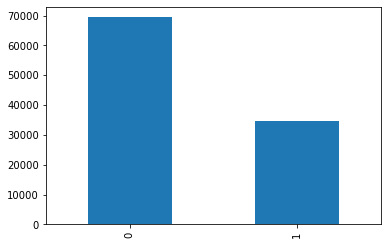

In [50]:
Text_dm['has_top5disease'].value_counts().plot(kind='bar');

In [51]:
Text_dm['length'].describe()

count    104161.000000
mean        134.079089
std          71.922189
min          18.000000
25%          81.000000
50%         126.000000
75%         175.000000
max         569.000000
Name: length, dtype: float64

In [52]:
Text_dm.dtypes

mednotes           object
has_top5disease     int64
length              int64
dtype: object

## Data processing

**Text Pre-processing In this step we have to remove punctuation, stop words, bad characters and so on. The second step is aimed to convertion all of the words to lower case 
and then stemmed them using the Porter Stemmer in the NLTK package.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, f1_score

In [54]:
stop = stopwords.words('french')
print(stop[::10])

porter = PorterStemmer()

['au', 'en', 'lui', 'notre', 'sa', 'tu', 'à', 'étant', 'serai', 'seraient', 'furent', 'fussiez', 'ai', 'auront', 'avaient', 'aient']


In [55]:
def remove_punctuation(mednotes):
    """The function to remove punctuation"""
    table = str.maketrans('', '', string.punctuation)
    return mednotes.translate(table)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def stemmer(stem_text):
    """The function to apply stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [56]:
# Apply the function to each example
Text_dm['mednotes'] = Text_dm['mednotes'].apply(remove_punctuation)
Text_dm['mednotes'] = Text_dm['mednotes'].apply(remove_stopwords)
Text_dm['mednotes'] = Text_dm['mednotes'].apply(stemmer)


In [57]:
Text_dm.nunique()

mednotes           64408
has_top5disease        2
length               469
dtype: int64

In [58]:
Text_dm['mednotes'][2]

'diabã\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â\x83ã\x83â\x83ã\x82â\x82ã\x83â\x82ã\x82â¨t suivinadiabã\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â¨t insulinodã\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â©pendantdiabet astheni amaigrissementurin frã©quent pendant nuit selon patient'

In [59]:
spec_chars = ["ã\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â\x83ã\x83â\x83ã\x82â\x82ã\x83â\x82ã\x82â"]
for char in spec_chars:
    Text_dm['mednotes'] = Text_dm['mednotes'].str.replace(char, ' ')

In [60]:
spec_chars = ["ã\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â"]
for char in spec_chars:
    Text_dm['mednotes'] = Text_dm['mednotes'].str.replace(char, ' ')

In [61]:
Text_dm['mednotes'][2]

'diab ¨t suivinadiab ¨t insulinod ©pendantdiabet astheni amaigrissementurin frã©quent pendant nuit selon patient'

In [62]:
#Tokenisation process
import nltk 
tokens = Text_dm['mednotes'][2]
nltk.pos_tag(word_tokenize(tokens))

[('diab', 'NN'),
 ('¨t', 'NNP'),
 ('suivinadiab', 'NN'),
 ('¨t', 'NNP'),
 ('insulinod', 'NN'),
 ('©pendantdiabet', 'NNP'),
 ('astheni', 'NN'),
 ('amaigrissementurin', 'NN'),
 ('frã©quent', 'NN'),
 ('pendant', 'NN'),
 ('nuit', 'NN'),
 ('selon', 'NN'),
 ('patient', 'NN')]

**Bag of words**
To run machine learning algorithms we need to convert the text files into numerical feature vectors. We will use bag of words model for our analysis. In general we segment each text file into words and count of times each word occurs in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a feature (descriptive feature). More precisely we will convert our text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized tf-idf representation (tf-idf transformer).

**CountVectorizer

In [63]:
vectorizer = CountVectorizer()
vectorizer.fit(Text_dm['mednotes'])
vector = vectorizer.transform(Text_dm['mednotes'])

In [64]:
#Display the matrix representative of text data
print(vector.shape)
#print(vector.toarray())


(104161, 39158)


In [65]:
# Extract the tfid representation matrix of the text data
#tfidf_converter = TfidfTransformer()
#X_tfidf = tfidf_converter.fit_transform(vector).toarray()
#X_tfidf

In [66]:
Text_dm['length'].describe()

count    104161.000000
mean        134.079089
std          71.922189
min          18.000000
25%          81.000000
50%         126.000000
75%         175.000000
max         569.000000
Name: length, dtype: float64

In [67]:
#Text_dm = Dm[['EXAMEN', 'CONCLUSION', 'TITRE_x','TITRE_y','visit_summary']]
Num_dm = Dm[['AGE', 'BMI', 'TaS', 'TaD', 'Glycemie', 'RespRate', 'Albumin', 'Creatine']]

In [68]:
#Separating text(input) and target classes

list_sentences_rawdata = Text_dm["mednotes"].values
list_classes = ["has_top5disease"]
target = Text_dm[list_classes].values

To_Process=Text_dm[['mednotes', 'has_top5disease']]

In [69]:
#Train and test split with 80:20 ratio
train, test = train_test_split(To_Process, test_size=0.2) 

# Define the sequence lengths, max number of words and embedding dimensions
# Sequence length of each sentence. If more, truncate. If less, pad with zeros

MAX_SEQUENCE_LENGTH = 300 

# Top 20000 frequently occurring words
MAX_NB_WORDS = 20000
 
from keras.preprocessing.text import Tokenizer
# Get the frequently occurring words
tokenizer = Tokenizer(num_words=MAX_NB_WORDS) 
tokenizer.fit_on_texts(train.mednotes) 
train_sequences = tokenizer.texts_to_sequences(train.mednotes)
test_sequences = tokenizer.texts_to_sequences(test.mednotes)

# dictionary containing words and their index
word_index = tokenizer.word_index 
vocab_size = len(word_index) + 1
# print(tokenizer.word_index) 
# total words in the corpus
print('Found %s unique tokens.' % len(word_index)) 

from keras.preprocessing.sequence import pad_sequences
# get only the top frequent words on train
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH) 

# get only the top frequent words on test
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH) 

print(train_data.shape)
print(test_data.shape)

Found 35825 unique tokens.
(83328, 300)
(20833, 300)


In [70]:
train_labels = train['has_top5disease']
test_labels = test['has_top5disease']

#import library

from sklearn.preprocessing import LabelEncoder
# converts the character array to numeric array. Assigns levels to unique labels.

le = LabelEncoder() 
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

[0 1]
(array([0, 1]), array([55460, 27868]))
(array([0, 1]), array([13928,  6905]))


In [71]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [72]:
from keras.utils.np_utils import to_categorical
# changing data types
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

EMBEDDING_DIM = 100
print(MAX_SEQUENCE_LENGTH)

Shape of data tensor: (83328, 300)
Shape of label tensor: (83328, 2)
Shape of label tensor: (20833, 2)
300


**Splitting the data into train and test with ratio 80-20**

In [73]:
#Splitting the data into train and test sets:random_state=1, stratify=y)
X = Text_dm['mednotes']
y = Text_dm['has_top5disease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((83328,), (20833,), (83328,), (20833,))

In [75]:
##meta input

In [76]:
Num_dm = Num_dm.replace(r'^\s*$', np.NaN, regex=True)
Num_dm = Num_dm.fillna(Num_dm.mean())

In [77]:
train_meta = Num_dm[:int(len(Num_dm)*0.8)]
test_meta = Num_dm[int(len(Num_dm)*0.8):]

In [78]:
train_meta = np.asarray(train_meta.values).astype('float32')
#train_meta = train_meta[['AGE']].values
test_meta = np.asarray(test_meta.values).astype('float32')
#test_meta = test_meta[['AGE']].values


In [79]:
##We will use here GloVe word embeddings for creating word vectors

In [177]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [178]:
len(embedding_matrix)

35671

In [ ]:
from keras.layers import concatenate, Dense, Embedding, Bidirectional, LSTM
from keras import Model, Input

In [188]:
seq_length = 300
## this input layer corresponds to text data
input_1 = Input(shape=(seq_length,))
## this corresponds to numerical data
input_2 = Input(shape=(8,))
##here we create the first submodel that accepts data from first input layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
## and here we create a second submodel that accepts input from the second input layer which is composed of two dense layers
dense_layer_1 = Dense(10, activation='relu')(input_2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

In [189]:
## What we want to do is concatenate the output from the first submodel with the output from the second submodel
##The output from the first submodel is the output from the LSTM_Layer_1 and similarly,
##the output from the second submodel is the output from the dense_layer_2

In [190]:
concat_layer = concatenate([LSTM_Layer_1, dense_layer_2])
dense_layer_3 = Dense(10, activation='relu')(concat_layer)
output = Dense(2, activation='sigmoid')(dense_layer_3)
model = Model(inputs=[input_1, input_2], outputs=output)

In [191]:
## The following code compiles the model and prints its summary

In [192]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 300, 100)     3567100     input_13[0][0]                   
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 10)           90          input_14[0][0]                   
______________________________________________________________________________________

In [193]:
## the code below should show and download an image for the newttwork diagram

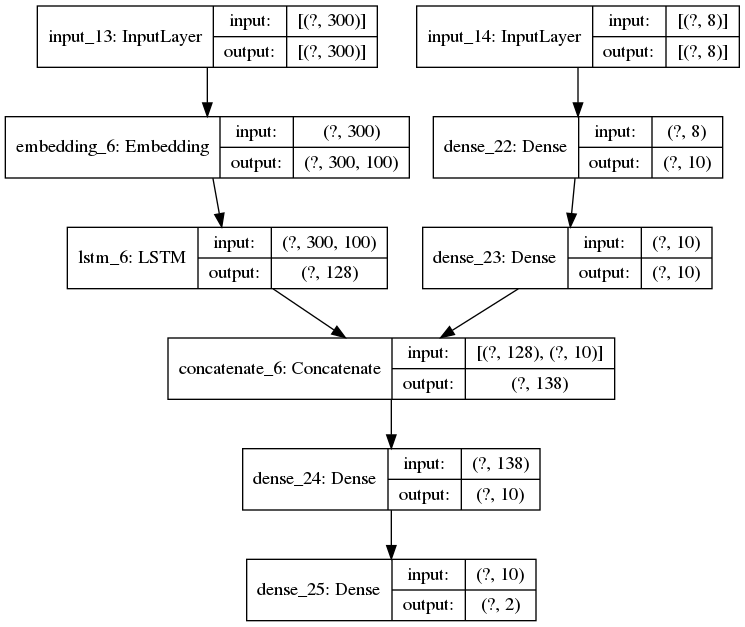

In [194]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [195]:
history = model.fit(x=[train_data, train_meta], y=labels_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
521/521 [==============================] - 29s 56ms/step - loss: 0.2363 - acc: 0.8885 - val_loss: 0.1332 - val_acc: 0.9623
Epoch 2/20
521/521 [==============================] - 29s 56ms/step - loss: 0.1244 - acc: 0.9646 - val_loss: 0.1278 - val_acc: 0.9630
Epoch 3/20
521/521 [==============================] - 29s 55ms/step - loss: 0.1187 - acc: 0.9658 - val_loss: 0.1262 - val_acc: 0.9629
Epoch 4/20
521/521 [==============================] - 29s 56ms/step - loss: 0.1176 - acc: 0.9659 - val_loss: 0.1265 - val_acc: 0.9631
Epoch 5/20
521/521 [==============================] - 29s 56ms/step - loss: 0.1156 - acc: 0.9662 - val_loss: 0.1268 - val_acc: 0.9627
Epoch 6/20
521/521 [==============================] - 30s 57ms/step - loss: 0.1143 - acc: 0.9665 - val_loss: 0.1279 - val_acc: 0.9630
Epoch 7/20
521/521 [==============================] - 29s 56ms/step - loss: 0.1445 - acc: 0.9569 - val_loss: 0.1377 - val_acc: 0.9605
Epoch 8/20
521/521 [==============================] - 30s 57ms

In [196]:
## To evaluate our model, we wil have to pass both the test inputs to the evaluate function

In [197]:
score = model.evaluate(x=[test_data, test_meta], y=labels_test, verbose=1)
#print("Test Score:", score[0])
print("Test Accuracy:", score[1])

652/652 [==============================] - 8s 12ms/step - loss: 0.1123 - acc: 0.9679
Test Accuracy: 0.9679355025291443


In [198]:
##let's now print the loss and accuracy for training and test sets

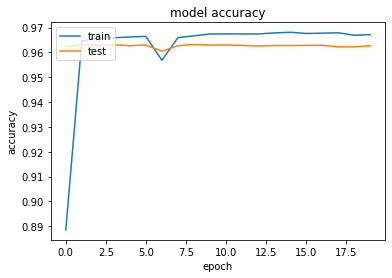

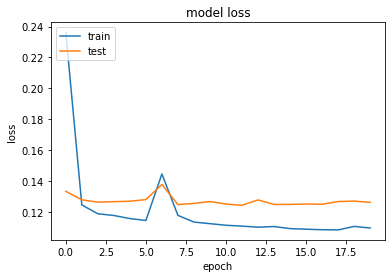

In [199]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

X_train## Combine Textual Inputs and Numerical Inputs in scikit-learn

In [77]:
## Num_dm contains a lot of empty strings in its columns we need to change them to numbers otherwise it will cause problem while running, i chose to replace with mean of each column

In [97]:
Num_dm = Num_dm.replace(r'^\s*$', np.NaN, regex=True)
Num_dm = Num_dm.fillna(Num_dm.mean())

In [98]:
train_num = Num_dm[:int(len(Num_dm)*0.8)]
test_num = Num_dm[int(len(Num_dm)*0.8):]

In [92]:
train_num['summary'] = X_train
test_num['summary'] = X_test

In [93]:
## also you need to change NaN values with other string or it will raise an error

In [94]:
train_num['summary'] = train_num['summary'].fillna('none')
test_num['summary'] = test_num['summary'].fillna('none')

In [95]:
all_train = np.array(train_num.values)
all_test = np.array(test_num.values)


In [102]:
type(all_train)

numpy.ndarray

In [265]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create Function Transformer to use Feature Union
def get_numeric_data(x):
    return [record[:-2].astype(float) for record in x]

def get_text_data(x):
    return [record[-1] for record in x]

transfomer_numeric = FunctionTransformer(get_numeric_data)
transformer_text = FunctionTransformer(get_text_data)

#transfomer_numeric = FunctionTransformer(Num_dm)
#transformer_text = FunctionTransformer(text_dm)

# Create a pipeline to concatenate Tfidf Vector and Numeric data
# Use RandomForestClassifier as an example
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', transfomer_numeric)
            ])),
             ('text_features', Pipeline([
                ('selector', transformer_text),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', RandomForestClassifier())
])

# Grid Search Parameters for RandomForest
param_grid = {'clf__n_estimators': np.linspace(1, 100, 10, dtype=int),
              'clf__min_samples_split': [3, 10],
              'clf__min_samples_leaf': [3],
              'clf__max_features': [10],
              'clf__max_depth': [None],
              'clf__criterion': ['gini'],
              'clf__bootstrap': [False]}

# Training config
kfold = StratifiedKFold(n_splits=5)
scoring = {'Accuracy': 'accuracy', 'F1': 'f1_macro'}
refit = 'F1'

# Perform GridSearch
rf_model = GridSearchCV(pipeline, param_grid=param_grid, cv=kfold, scoring=scoring, 
                         refit=refit, n_jobs=-1, return_train_score=True, verbose=1)
## comment the line below
rf_model.fit(all_train[:20000], y_train[:20000])
## use the line below instead of the above to train the model on the whole data
#rf_model.fit(all_train, y_train)
rf_best = rf_model.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.6s finished


In [268]:
all_test = rf_model.best_estimator_.named_steps['features'].transform(all_test)
y_pred = rf_model.best_estimator_.named_steps['clf'].predict(all_test)

In [269]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [274]:
from sklearn.metrics import accuracy_score
print("the accuracy score is : "+ str(accuracy_score(y_test, y_pred)))

the accuracy score is : 0.6660106561704987


In [275]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[13866,    12],
       [ 6946,     9]])